# Gorkha, Nepal earthquake USGS dataset

https://www.usgs.gov/data/map-data-landslides-triggered-25-april-2015-mw-78-gorkha-nepal-earthquake#:~:text=The%2025%20April%202015%20Mw%207.8%20Gorkha%20earthquake%20and%20its,Himalaya%20of%20Nepal%20and%20China.

Roback, Kevin, Clark, M.K., West, A.J., Zekkos, Dimitrios, Li, Gen, Gallen, S.F., Champlain, Deepak, and Godt, J.W., 2017, Map data of landslides triggered by the 25 April 2015 Mw 7.8 Gorkha, Nepal earthquake: U.S. Geological Survey data release, https://doi.org/10.5066/F7DZ06F9.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

## Load data and calculate geometries and areas

In [2]:
#Loaded data
landslides = gpd.read_file('Shapefile/Full20170209.shp')
landslides

,Area,Trigger,Date_ided,Extent,Source,Date_map,geometry
0,3029.370,4/25 mainshock,5/2,complete,Worldview/GeoEye Satellites,6/3,"POLYGON ((377314.844 3106287.734, 377315.189 3..."
1,5436.930,4/25 mainshock,5/2,complete,Worldview/GeoEye Satellites,6/3,"POLYGON ((377261.009 3106227.635, 377260.059 3..."
2,757.662,4/25 mainshock,5/2,complete,Worldview/GeoEye Satellites,6/3,"POLYGON ((377246.707 3106285.815, 377247.254 3..."
3,52163.700,4/25 mainshock,5/2,complete,Worldview/GeoEye Satellites,6/3,"POLYGON ((377185.067 3106268.337, 377185.581 3..."
4,4287.060,4/25 mainshock,5/2,complete,Worldview/GeoEye Satellites,6/3,"POLYGON ((377149.760 3106409.470, 377149.117 3..."
...,...,...,...,...,...,...,...
24910,694.031,4/25 mainshock,5/17,complete,Worldview/GeoEye Satellites,Post-monsoon,"POLYGON ((471937.805 3062067.626, 471937.960 3..."
24911,273.941,4/25 mainshock,5/17,complete,Worldview/GeoEye Satellites,Post-monsoon,"POLYGON ((467454.678 3062831.920, 467461.028 3..."
24912,798.814,4/25 mainshock,5/17,complete,Worldview/GeoEye Satellites,Post-monsoon,"POLYGON ((467417.636 3062854.675, 467420.268 3..."
24913,551.393,4/25 mainshock,5/17,complete,Worldview/GeoEye Satellites,Post-monsoon,"POLYGON ((468391.133 3056306.687, 468394.790 3..."


The geometries set to lat/lon values for ease of use

In [3]:
landslides['lon/lat geometry'] = landslides['geometry'].to_crs('EPSG:4326')

#### Calculated Areas based on original geometries, and set to the correct number of significant figures

In [4]:
landslides['new area'] = landslides['geometry'].area

In [5]:
landslides['new area'] = landslides['new area'].apply(lambda x: round(x, -int(np.floor(np.log10(abs(x)))) + 5))

## Exploration of Data

In [6]:
#landslides[landslides['Area'] == landslides['Area'].max()]

In [7]:
#landslides[landslides['new area'] == landslides['new area'].max()]

<function matplotlib.pyplot.show(close=None, block=None)>

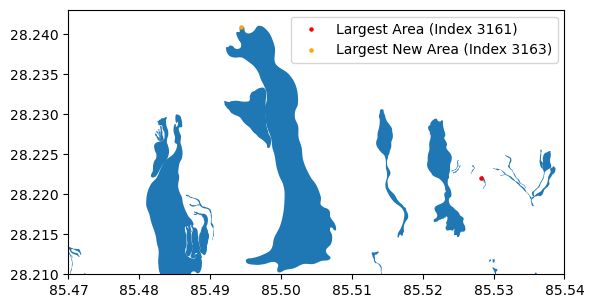

In [8]:
landslides['lon/lat geometry'].plot()
plt.scatter(85.52828, 28.2220, color = 'r', s = 5, label = 'Largest Area (Index 3161)')
plt.scatter(85.49439, 28.24081, color = 'orange', s = 5, label = 'Largest New Area (Index 3163)') #Largest area based off those calculated below
plt.xlim(85.47, 85.54)
plt.ylim(28.21,28.243)
plt.legend()
plt.show

The largest areas are the same in both datasets, but are offset by 2 value

In [9]:
similarity = landslides['Area'] == landslides['new area']

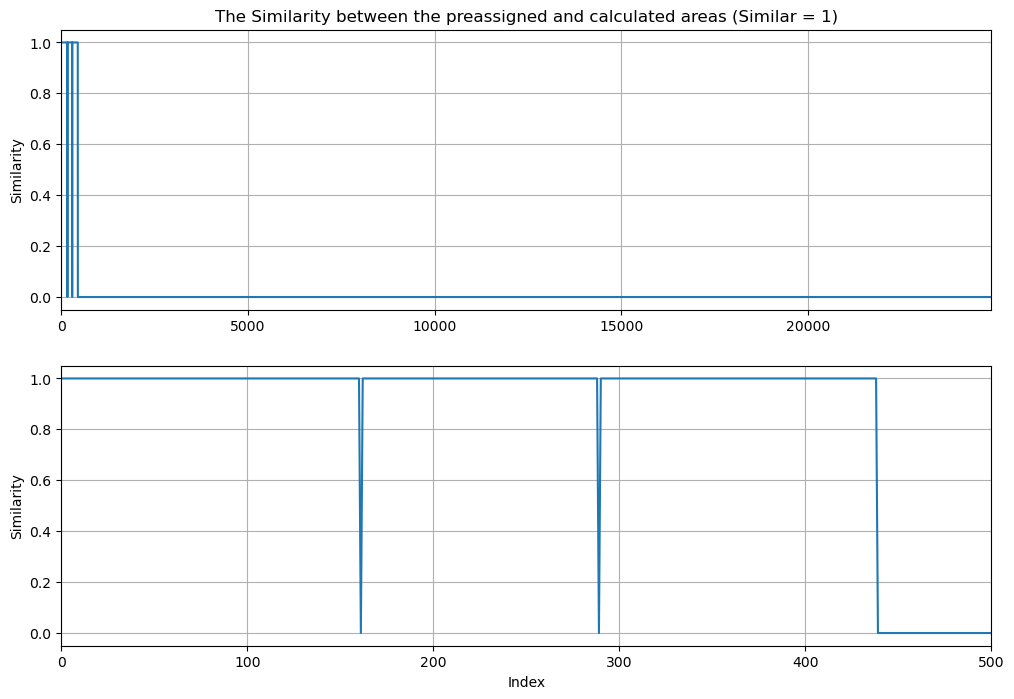

In [10]:
fig, ax = plt.subplots(2,1,figsize = (12,8))
#plt.figure(figsize=(13,4))
ax[0].plot(similarity.index, similarity.astype(int))
ax[0].set_xlim(0,len(landslides))
ax[0].grid()
ax[1].plot(similarity.index, similarity.astype(int))
ax[1].set_xlim(0,500)
ax[1].grid()
plt.xlabel('Index')
ax[0].set_ylabel('Similarity')
ax[1].set_ylabel('Similarity')
ax[0].set_title('The Similarity between the preassigned and calculated areas (Similar = 1)')
plt.show()

In [11]:
landslides['Area']

0         3029.370
1         5436.930
2          757.662
3        52163.700
4         4287.060
           ...    
24910      694.031
24911      273.941
24912      798.814
24913      551.393
24914      491.777
Name: Area, Length: 24915, dtype: float64

In [12]:
landslides['new area']

0         3029.370
1         5436.930
2          757.662
3        52163.700
4         4287.060
           ...    
24910     3331.960
24911    12816.100
24912     2766.480
24913     6025.760
24914      694.031
Name: new area, Length: 24915, dtype: float64

There is a strong link at the top of the dataset, but by the end of the dataset, the values seem to be offset. This is shown by the calculated value of row 24914 being equivalent to that of the precalculated value of row 24910

### A look at the distribution of the areas with some row shifts

##### Looking at some of the plots it was clear that some values differed by 0.001 or so value, but where the same across both datasets. So the significant figures of both lists was reduced for the following steps to account for those values

In [13]:
landslides['new area 5'] = landslides['new area'].apply(lambda x: round(x, -int(np.floor(np.log10(abs(x)))) + 4))
landslides['area 5'] = landslides['Area'].apply(lambda x: round(x, -int(np.floor(np.log10(abs(x)))) + 4))

In [14]:
similarity0 = [0 if value else None for value in landslides['area 5'] == landslides['new area 5']]
similarity1 = [1 if value else None for value in landslides['area 5'] == landslides['new area 5'].shift(-1)]
similarity2 = [2 if value else None for value in landslides['area 5'] == landslides['new area 5'].shift(-2)]
similarity3 = [3 if value else None for value in landslides['area 5'] == landslides['new area 5'].shift(-3)]
similarity4 = [4 if value else None for value in landslides['area 5'] == landslides['new area 5'].shift(-4)]
similarity5 = [5 if value else None for value in landslides['area 5'] == landslides['new area 5'].shift(-5)]

In [15]:
combined = [x if x is not None else 
            y if y is not None else
            z if z is not None else 
            a if a is not None else
            b if b is not None else
            c
            for x,y,z,a,b,c in zip(similarity0, similarity1, similarity2, similarity3, similarity4, similarity5)]

In [16]:
non_indices = [i for i, val in enumerate(combined) if val is None]

Number of values still valued as None = 27


Text(0.5, 0, 'Index')

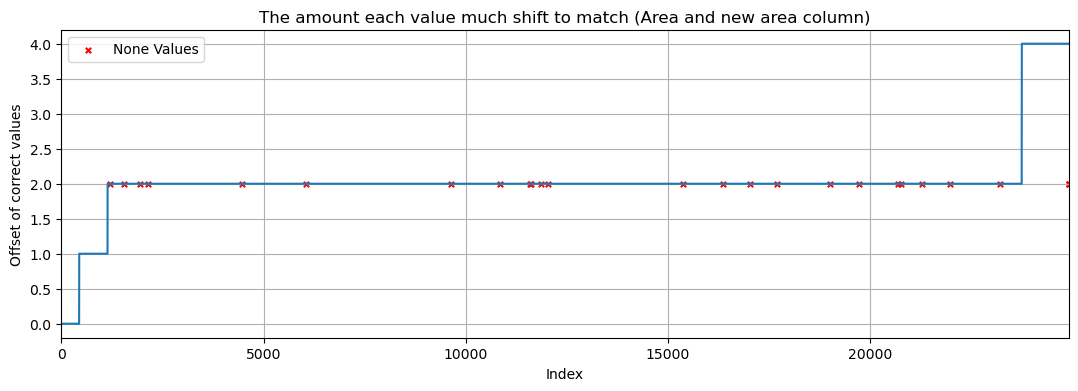

In [17]:
plt.figure(figsize=(13,4))
plt.plot(combined)
plt.xlim(0,len(landslides))
plt.scatter(non_indices, [2]*len(non_indices), marker = 'x', color = 'red', s = 15, label = 'None Values')
plt.ylabel('Offset of correct values')
plt.legend()
plt.grid()
print('Number of values still valued as None =',sum(1 for item in combined if item is None))
plt.title('The amount each value much shift to match (Area and new area column)')
plt.xlabel('Index')

Changing significant figures down to 5 reduces the number of none values from 222 down to 27

# Sources

In [18]:
sources = gpd.read_file('Shapefile/Source20170209.shp')
sources['geometry'].area

0         289.651954
1        1754.756841
2         172.111839
3        2930.475721
4         610.092126
            ...     
24790     490.876629
24791     953.625580
24792     268.466630
24793     947.765756
24794      75.780602
Length: 24795, dtype: float64

In [19]:
sources['Area']

0         289.6520
1        1754.7600
2         172.1120
3        2930.4800
4         610.0920
           ...    
24790     490.8770
24791     953.6260
24792     268.4670
24793     947.7660
24794      75.7806
Name: Area, Length: 24795, dtype: float64

No such discrepancy is seen here